## Assignment 03 - Obeject Counting on a Conveyor Belt 
Name - **Senadheera P.I.P**   
Index No - **190574U**

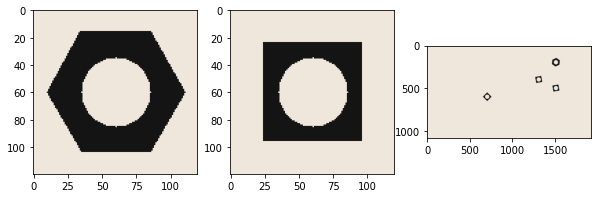

In [41]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread(r'./Images/hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread(r'./Images/squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread(r'./Images/conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3,figsize=(10,10))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

hexnut_template -> threshold value =  20.0
squarenut_template -> threshold value =  20.0
conveyer_f100 -> threshold value =  20.0


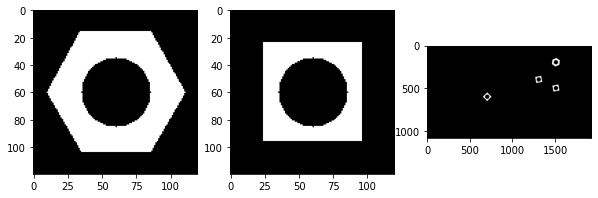

In [42]:
# Convert images to grayscale
hexnut_template = cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
squarenut_template = cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
conveyor_f100 = cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY)

# Applying Otsu's thresholding the images
ret1, thresh1 = cv.threshold(hexnut_template,0,255,cv.THRESH_BINARY_INV | cv.THRESH_OTSU)
ret2, thresh2 = cv.threshold(squarenut_template,0,255,cv.THRESH_BINARY_INV | cv.THRESH_OTSU)
ret3, thresh3= cv.threshold(conveyor_f100,0,255,cv.THRESH_BINARY_INV | cv.THRESH_OTSU)

print("hexnut_template -> threshold value = ",ret1)
print("squarenut_template -> threshold value = ",ret2)
print("conveyer_f100 -> threshold value = ",ret3)

fig, ax = plt. subplots(1,3, figsize=(10,10))
ax[0].imshow(cv.cvtColor(thresh1, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(thresh2, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(thresh3, cv.COLOR_RGB2BGR))

plt.show()

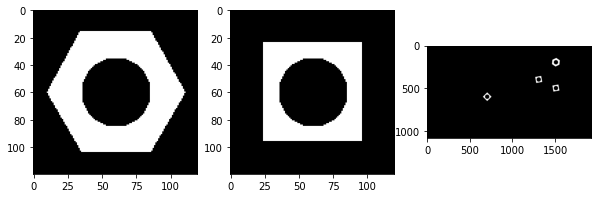

In [43]:
# Apply morphological closing on the images
kernel = np.ones((3,3),np.uint8)
closing1 = cv.morphologyEx(thresh1, cv.MORPH_CLOSE, kernel).astype(np.uint8)
closing2 = cv.morphologyEx(thresh2, cv.MORPH_CLOSE, kernel).astype(np.uint8)
closing3 = cv.morphologyEx(thresh3, cv.MORPH_CLOSE, kernel).astype(np.uint8)

fig, ax = plt. subplots(1,3, figsize=(10,10))
ax[0].imshow(cv.cvtColor(closing1, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(closing2, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(closing3, cv.COLOR_RGB2BGR))
plt.show()

Connected components Analysis on Hex Nut Image

No.of connected components =  2 (Background is also considered as a connected component)
---Statistics---
h = 88
w = 101
c = 60px, 59px


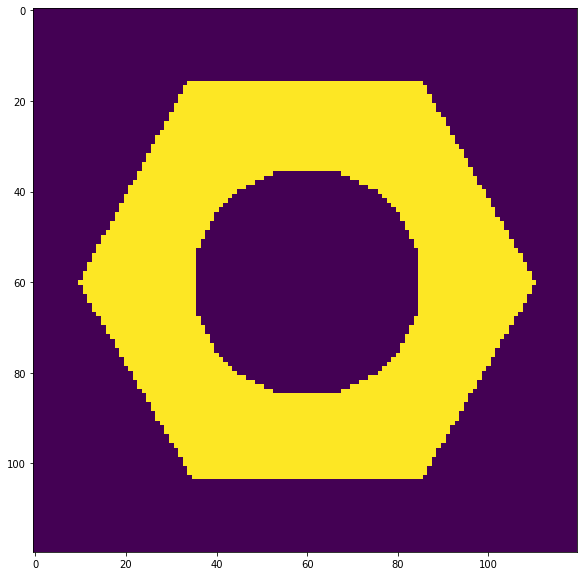

In [44]:
connectivity = 4  
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(closing1 , connectivity , cv.CV_32S)

print("No.of connected components = ", num_labels, "(Background is also considered as a connected component)")
x,y,w,h = stats[1][0],stats[1][1],stats[1][2],stats[1][3]
centroidx,centroidy = round(centroids[1][0]),round(centroids[1][1])
print(f"---Statistics---")
print(f'h = {h}\nw = {w}\nc = {centroidx}px, {centroidy}px')

plt.imshow(labels)
plt.show()

Connected components Analysis on Square Nut Image

No.of connected components =  2 (Background is also considered as a connected component)
---Statistics---
h = 72
w = 72
c = 59px, 59px


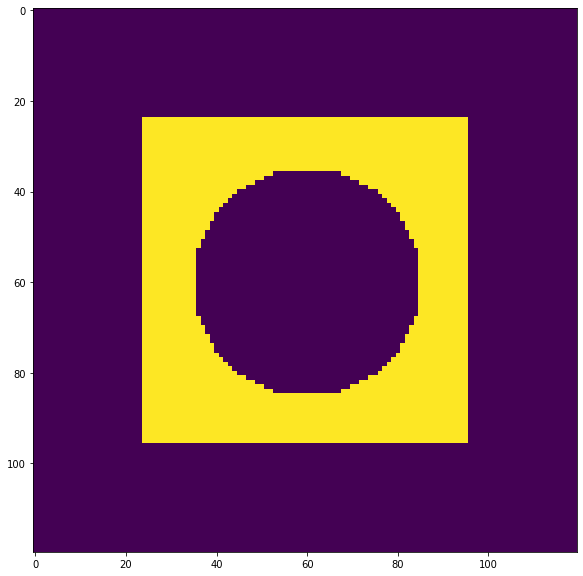

In [45]:
connectivity = 4  
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(closing2 , connectivity , cv.CV_32S)

print("No.of connected components = ", num_labels, "(Background is also considered as a connected component)")
x,y,w,h = stats[1][0],stats[1][1],stats[1][2],stats[1][3]
centroidx,centroidy = round(centroids[1][0]),round(centroids[1][1])
print(f"---Statistics---")
print(f'h = {h}\nw = {w}\nc = {centroidx}px, {centroidy}px')

plt.imshow(labels)
plt.show()

plt.show()

No.of connected components =  5 (Background is also considered as a connected component)


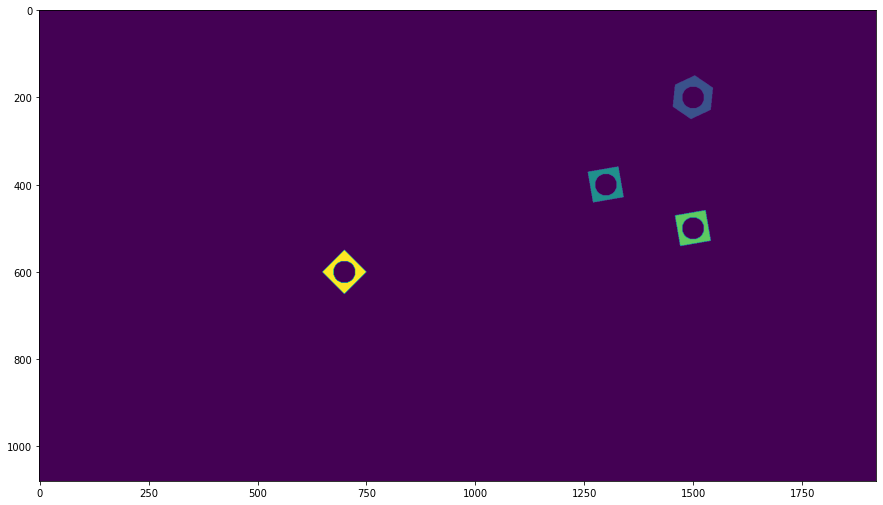

In [46]:
connectivity = 4  
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(closing3 , connectivity , cv.CV_32S)

print("No.of connected components = ", num_labels, "(Background is also considered as a connected component)")

plt.imshow(labels)
plt.show()

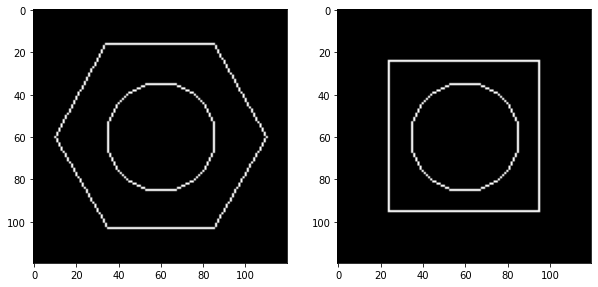

In [47]:
contours1, hierarchy1 = cv.findContours(closing1, 2, 1)
contours2, hierarchy2 = cv.findContours(closing2, 2, 1)

im1 = np.zeros((closing1.shape[0],closing1.shape[1]))
im2 = np.zeros((closing2.shape[0],closing2.shape[1]))

cv.drawContours(im1, contours1, -1, (255,255,255), 1)
cv.drawContours(im2, contours2, -1, (255,255,255), 1)

fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(im1, cmap='gray')
ax[1].imshow(im2, cmap = 'gray')

plt.show()

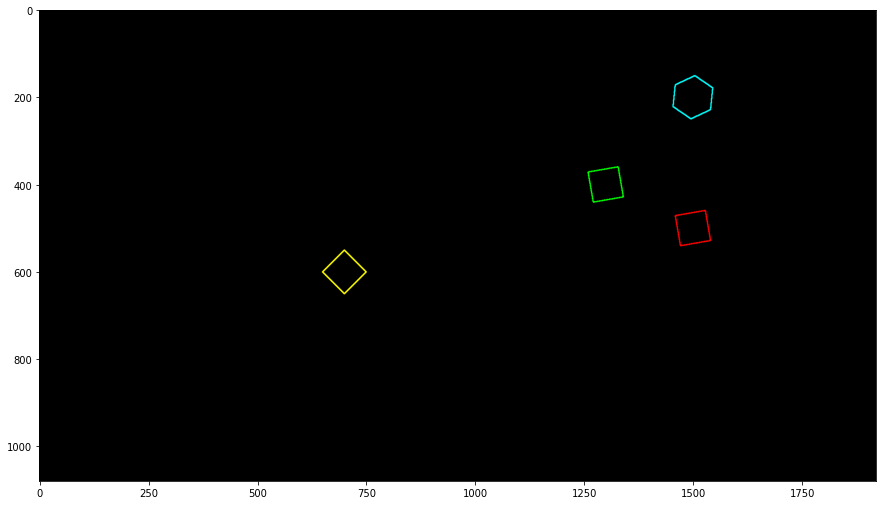

In [48]:
# Finding the contours of the conveyor template
contours3, hierarchy3 = cv.findContours(closing3, 2, 1)
im3 = np.zeros((1080, 1920, 3)).astype(np.uint8)
cv.drawContours(im3, contours3, 0, (0,255,255), 2)
cv.drawContours(im3, contours3, 2, (0,0,255), 2)
cv.drawContours(im3, contours3, 4, (0,255,0), 2)
cv.drawContours(im3, contours3, 6, (255,255,0), 2)


plt.rcParams["figure.figsize"] = (15,10)
plt.imshow(cv.cvtColor(im3, cv.COLOR_BGR2RGB))
plt.show()

# Detecting Objects on a Synthetic Conveyor

In [49]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture(r'./Images/conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


In [50]:
#contours,hierarchy = cv.findContours(closing1,2,1) # finding contours of hexnut_template.png
hexnut_count = 0
for i in range(len(contours3)):
    cnt1 = contours1[0]
    cnt2 = contours3[i]
    ret = cv.matchShapes(cnt1,cnt2,1,0.0)
    if ret < 0.0001:
        hexnut_count+=1

print("Number of hexnuts = ", hexnut_count)

Number of hexnuts =  1


conveyor_f100 --> hexnut_count = 1 | squarenut_count = 3
conveyor_f101 --> hexnut_count = 1 | squarenut_count = 3


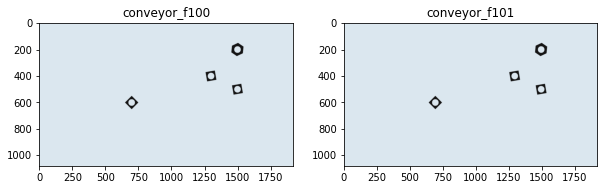

In [51]:
# Experiment
im_names = ['./Images/conveyor_f100.png', './Images/conveyor_f101.png']
im_title=['conveyor_f100', 'conveyor_f101']

fig, ax = plt. subplots(1,2, figsize=(10,10))

for i in range(0,2):
    img =  cv.imread(im_names[i], cv.IMREAD_COLOR)
    im = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret, f = cv.threshold(im,0,255,cv.THRESH_BINARY_INV | cv.THRESH_OTSU)
    contours, hierarchy = cv.findContours(f, 2, 1)
    hexnut_count = 0
    sqrnut_count = 0

    for j in range(len(contours)):
        cnt1,cnt2,cnt = contours1[0], contours2[0], contours[j]
        ret1 = cv.matchShapes(cnt1,cnt,1,0.0)
        ret2 = cv.matchShapes(cnt2,cnt,1,0.0)
        a1 = cv.contourArea(contours1[0])-cv.contourArea(contours[j])
        a2 = cv.contourArea(contours2[0])-cv.contourArea(contours[j])

        if ret1 < 0.001:
            hexnut_count+=1    
        if ret2 < 0.001:
            sqrnut_count+=1

    print(f'{im_title[i]} --> hexnut_count = {hexnut_count} | squarenut_count = {sqrnut_count}')
    ax[i].imshow(img)
    ax[i].set_title(im_title[i])
    plt.show


In [52]:
frame_array = []
shape = (1080, 1920, 3)

cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture(r'./Images/conveyor.mp4')
f = 0
frame = []      
total_obj = 0 # total count upto current frame
prev=0 
kernel = np.ones((3,3),np.uint8)
while cap.isOpened():                             
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    #morphological closing
    fr_gray = cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
    ret,fr_thresh = cv.threshold(fr_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
    fr_closing=cv.morphologyEx(fr_thresh, cv.MORPH_CLOSE, kernel)

    #Getting all the contours of the current frame
    contours,hierarchy = cv.findContours(fr_closing,2,1)
    obj_count=0
    for i in range(len(contours)):

        #Looking for similarity between contours
        err_hex = cv.matchShapes(contours1[0],contours[i],1,0.0)
        err_square= cv.matchShapes(contours2[0],contours[i],1,0.0)
    
        #Detecting objects
        if ((err_hex<0.001) or (err_square<0.001)):
            obj_count+=1
            
    if (prev<obj_count):
        total_obj +=(obj_count-prev)

    prev=obj_count        
    f += 1
    text = 'Frame:' + str(f) +' '+ '| Current count:' + str(obj_count) + " | Count upto frame:"+ str(total_obj)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (20,0,255), 1, cv.LINE_AA)
    frame_array.append(frame)
    
    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

# Writing the video


out = cv.VideoWriter('conveyor_result_190574U.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.
